# Creating and Backtesting Fibonacci Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("EURUSD_ohlc.csv", parse_dates = [0], index_col = 0)
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
dtypes: float64(4)
memory usage: 148.9 KB


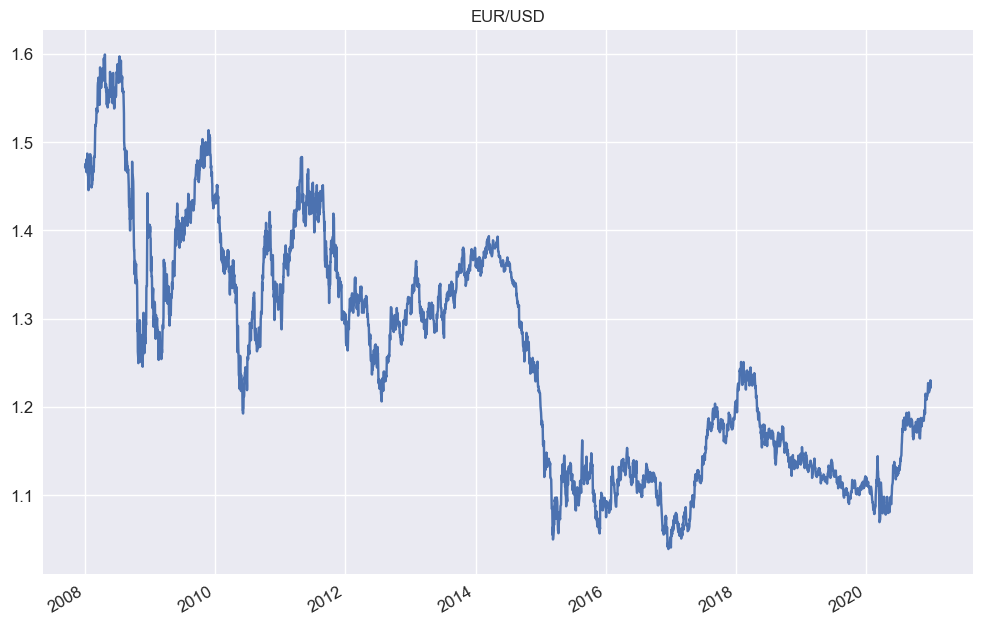

In [4]:
data.Close.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

## A first Intuition on Fibonacci Retracement (Uptrend)

__Uptrend: Higher Highs and Higher Lows__

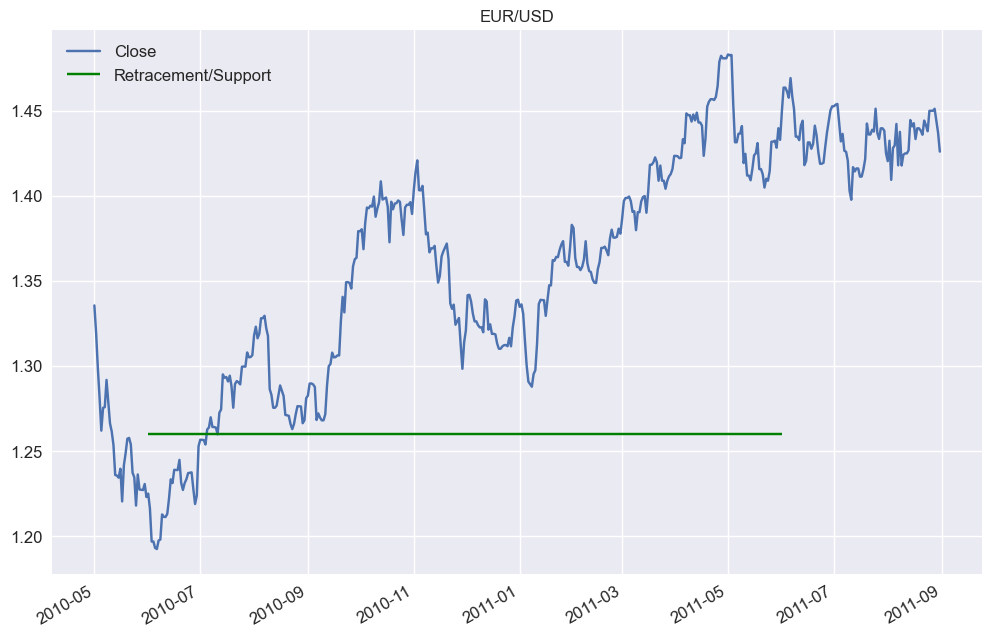

In [5]:
data.loc["05-2010":"08-2011", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.26, xmin = "06-2010", xmax = "06-2011", color = "green", label = "Retracement/Support")
plt.legend(fontsize = 12)
plt.show()

__Retracement__: After having reached a Higher High in an Uptrend, the __price temporarily returns (retraces) part way back__ to the previous price level before the Uptrend continues. -> __Support at Retracement Level(s)__

In [6]:
high = data.loc["06-2010":"08-2010", "Close"].max()
high

np.float64(1.32942)

In [7]:
low = data.loc["06-2010":"08-2010", "Close"].min()
low

np.float64(1.19236)

In [8]:
fifty_percent = (low + high)/2
fifty_percent

np.float64(1.26089)

__Fibonacci Levels derived from Fibonacci numbers: 23.6%, 38.2%, 61.8%__

In [9]:
fibonacci1 = 0.236
fibonacci1

0.236

In [10]:
R1 = high - (high-low) * fibonacci1
R1

np.float64(1.2970738400000001)

In [11]:
fibonacci2 = 0.382
fibonacci2

0.382

In [12]:
R2 = high - (high-low) * fibonacci2
R2

np.float64(1.27706308)

In [13]:
fibonacci3 = 0.618
fibonacci3

0.618

In [14]:
R3 = high - (high-low) * fibonacci3
R3

np.float64(1.2447169200000001)

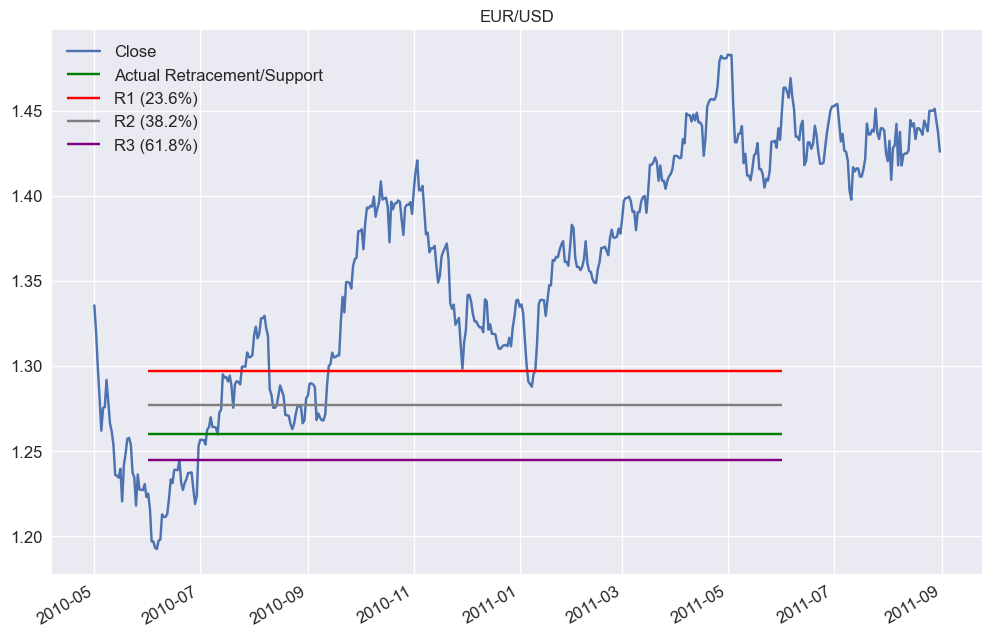

In [15]:
data.loc["05-2010":"08-2011", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.26, xmin = "06-2010", xmax = "06-2011", color = "green", label = "Actual Retracement/Support")
plt.hlines(y = R1, xmin = "06-2010", xmax = "06-2011", color = "red", label = "R1 (23.6%)")
plt.hlines(y = R2, xmin = "06-2010", xmax = "06-2011", color = "grey", label = "R2 (38.2%)")
plt.hlines(y = R3, xmin = "06-2010", xmax = "06-2011", color = "purple", label = "R3 (61.8%)")
plt.legend(fontsize = 12)
plt.show()

__Retracement Level Breakout__: If the price breaks through Retracement Level(s), this could indicate a Trend Reversal (Downtrend)